# K-Nearest Neighbor Algorithmus:

#### Parameter:  

dataset = (X, Y)  
mit X := Features  
und Y := Classes  

K := Hyperparameter für die nächsten k Nachbarn  
sample := Neuer Datenpunkt zum Klassifizieren 

#### Pseudo-Code:

kNN (dataset, K, sample):  
  - Bestimme von jedem Punkt $p \in dataset$ die Distanz, mit der geg. Distanzfunktion.
  - Bestimme die $K$ nächst gelegenen Nachbarn und bestimme die zugehörige Klasse von $sample$.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_dataset():
    cov = np.array([[1, 0], [0, 1]])
    data1 = np.random.multivariate_normal(np.array([9, 0]), cov, 10)
    data2 = np.random.multivariate_normal(np.array([-10, 4]), cov, 6)
    data3 = np.random.multivariate_normal(np.array([-10, 10]), cov, 13)
    data = np.concatenate((data1, data2, data3), axis=0)
    classes = np.array([0 for i in range(10)] + [1 for i in range(6)] + [2 for i in range(13)])
    return data, classes

In [3]:
dataset, classes = generate_dataset()

In [4]:
print(dataset.shape)
print(classes.shape)
print("Sample: x[0], y[0]")
print(dataset)
print(classes)

(29, 2)
(29,)
Sample: x[0], y[0]
[[  8.62625231  -0.97492743]
 [  9.50350866   0.02851954]
 [  9.54377711  -1.79959032]
 [  7.78208521   1.86294584]
 [  8.75213084   0.12415045]
 [  7.26122869  -1.57596995]
 [  8.88267342  -0.16449622]
 [  7.7659678    0.21721001]
 [  6.20931829  -0.62319538]
 [  9.33873878   0.20990497]
 [ -9.18295431   4.33173358]
 [-10.42902423   3.99234216]
 [-11.18965543   5.77839204]
 [ -9.32099155   3.38392864]
 [-11.61751081   3.77342894]
 [ -9.79797446   4.09463662]
 [ -9.35537034   9.97227009]
 [ -8.74111189  10.65050813]
 [ -7.92040191   9.6622032 ]
 [ -9.71385084   8.16343433]
 [-10.70779424   9.16395758]
 [ -8.11598781   8.83634027]
 [ -8.6862854   11.53797867]
 [ -9.123404     9.63948247]
 [-10.1592342   10.55895304]
 [ -9.88142751  11.10225866]
 [-10.86388308   9.67147645]
 [ -9.83393202   9.80987485]
 [-10.50604999   9.99695855]]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [5]:
def plot_dataset(dataset, classes):
    colors = ["red", "blue", "green"]
    for index, point in enumerate(dataset):
        print(index, point)
        print(classes[index])
        plt.scatter(point[0], point[1], color=colors[classes[index]])
    plt.show()

In [6]:
def distance(p1, p2):
    # Euklid
    distance = np.linalg.norm(p1 - p2)
    return distance

In [7]:
def vote(neighbours, num_classes):
    #vote = [0 for i in range(num_classes)]
    vote = np.zeros(num_classes)
    for neigh in neighbours:
        cl = neigh[1]
        vote[cl] += 1
    maxi = max(vote)
    idx =np.argwhere(vote==maxi)
    if idx.shape != 1:
        distance = [neighbours[i][0] for i in range(num_classes)]
        print(distance)
        temp = np.argmin(distance)
        voted_class = neighbours[temp][1]
    else:
        voted_class = np.argmax(vote) 
    return voted_class

In [8]:
def KNN(dataset, classes, num_classes, K, sample):
    num_samples = dataset.shape[0]
    num_features = dataset.shape[1]
    # List with distances from sample to dataset
    neighbours = sorted([(distance(sample, dataset[i]), classes[i], dataset[i]) for i in range(num_samples)])
    neighbours = neighbours[:K]
    voted_class = vote(neighbours, num_classes)
    return voted_class, neighbours

In [9]:
K = 3
sample = np.array([0, 6])
num_classes = np.unique(classes).shape[0]

voted_class, neighbours = KNN(dataset, classes, num_classes, K, sample)
# Distance, Class, Coordinate
print(neighbours)
print(voted_class)

[8.597330068943341, 8.726081521851548, 8.813402710985118]
[(8.597330068943341, 2, array([-8.11598781,  8.83634027])), (8.726081521851548, 2, array([-7.92040191,  9.6622032 ])), (8.813402710985118, 0, array([7.78208521, 1.86294584]))]
2


In [10]:
def plot_knn(dataset, classes, sample, voted_class, neighbours):
    colors = ["red", "blue", "green"]
    for index, point in enumerate(dataset):
        plt.scatter(point[0], point[1], color=colors[classes[index]])
    plt.scatter(sample[0], sample[1], color=colors[voted_class])
    for neigh in neighbours:
        cl = neigh[1]
        p = neigh[2]
        #plt.scatter(p[0], p[1], color="yellow", s=100)
        plt.plot((p[0], sample[0]), (p[1], sample[1]), color='cyan')
    plt.show()

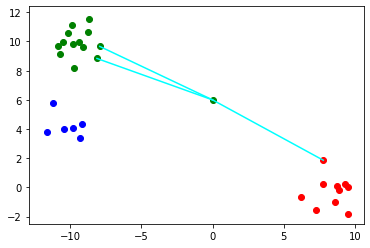

In [11]:
plot_knn(dataset, classes, sample, voted_class, neighbours)